# Classification

### Michał Spinczyk

In [265]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

In [266]:
db_iris = datasets.load_iris()
iris_X = db_iris.data
iris_Y = db_iris.target
iris_X = (iris_X - iris_X.mean()) / iris_X.std() # normalization

#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris_X, iris_Y, test_size=0.5, random_state = 41)
 
#An example of using the Euclidean distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)

In [267]:

from pandas.core.indexes.base import Index
n = 74

def most_common(lst):
    return max(set(lst), key=lst.count)

# implementation of kNN

def kNN(features_train,labels_train,features_test, labels_test, n):
  results = [[] for _ in range(1,n)]
  arr = np.c_[features_train,labels_train]
  errors = [0 for _ in range(1,n)]
  ind_ = 0
  for obj in features_test:
    distances = []
    for el in arr:
      dst = distance.euclidean(tuple(obj), tuple(el[0:4]))
      distances.append((dst,el[4]))
      distances.sort(key=lambda tup: tup[0])
    idx = 0
    for k in range(0,n-1):
      distances_ = []
      distances_ = [distances[i][1] for i in range(k+1)]
      x = most_common(distances_)
      results[k].append(int(x))
      if int(x) != int(labels_test[ind_]):
        errors[idx] += 1
      idx += 1
    ind_ += 1
  return errors, results

errors, results = kNN(features_train,labels_train,features_test,labels_test, n)

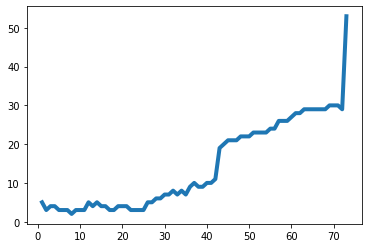

In [268]:
import numpy as np
import matplotlib.pyplot as plt 

wec = np.arange(1, n)

plt.figure()
plt.plot(wec, errors, label = "implementation",linewidth = 4)
plt.show()


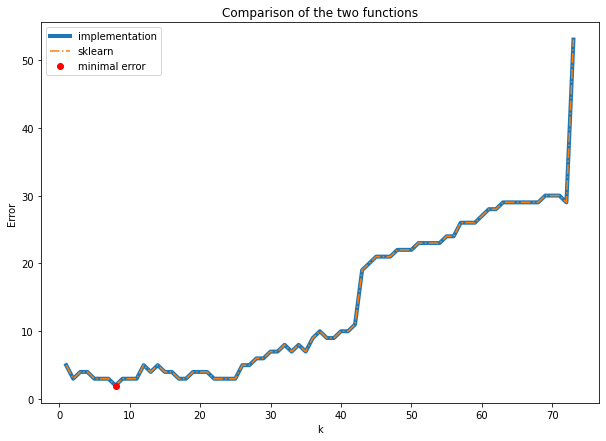

Best k for the set: 8
Chcecking if predictions are the same: True
The accuracy of my implementation is 0.9733333333333334
The accuracy of sklearn implementation is 0.9733333333333334


In [269]:
from sklearn.neighbors import KNeighborsClassifier
errors2 = [0 for _ in range(1,n)]
results2 = []
for k in range(1,n):
  knn=KNeighborsClassifier(k)
  knn.fit(features_train, labels_train)
  y_pred_sklearn= knn.predict(features_test)
  results2.append(y_pred_sklearn)
  for i in range(len(y_pred_sklearn)):
    # print(y_pred_sklearn[i], labels_test[i])
    if y_pred_sklearn[i] != labels_test[i]:
      errors2[k-1] += 1
best_k = errors.index(min(errors))

plt.figure(figsize = (10,7))
plt.plot(wec, errors, label = "implementation",linewidth = 4)
plt.plot(wec, errors2, linestyle = '-.',label = 'sklearn')
plt.plot(best_k+1,errors[best_k], "ro", label = "minimal error" )
plt.legend()
plt.ylabel("Error")
plt.xlabel("k")
plt.title('Comparison of the two functions')
plt.show()

# Checking the effectiveness of the classifier
print("Best k for the set:",best_k + 1)
print("Chcecking if predictions are the same:", errors == errors2)
print(f'The accuracy of my implementation is {accuracy_score(labels_test, results[best_k])}')
print(f'The accuracy of sklearn implementation is {accuracy_score(labels_test, results2[best_k])}')

In [270]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

# clf.predict(iris.data[:1, :]) # Predicting examples to belong to classes

clf.predict_proba(iris.data[:1, :]) # Estimating the probability of belonging to classes

array([[1., 0., 0.]])

In [271]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

In [272]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.metrics  import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
 
# wczytywanie danych
dane = loadmat('mnist.mat')

#Ex.1.Divide the data into parameters X and answer y:
 
X = dane['data'].T
y = dane['label'].T
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number

# nie udało mi się pobrać obrazów 20 x 20 px więc użyłem obrazów 28 x 28 px
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print("Liczba cyfr: ", X.shape[0])
print('Liczba pikseli w jednym obrazie: ', X.shape[1])


Liczba cyfr:  70000
Liczba pikseli w jednym obrazie:  784


In [273]:
dane

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]]),
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object)}

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


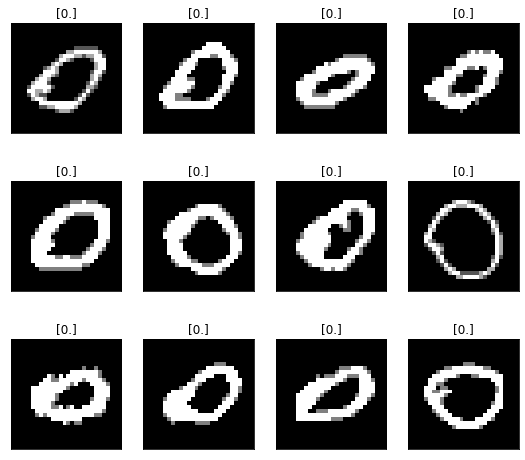

In [274]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_mnist(X, y, h, w)
plt.show()

F1 =  0.8289999999999998
Confusion matrix =  [[1876    0   42   14   11   48   24   24   25    7]
 [  13 2202   43   21    3   17    5   16   32   16]
 [  50   17 1742   36   59   20   46   41   60   33]
 [  22   14   83 1560   29  179   15   37   72   75]
 [  18    2   29   20 1620   37   21   25   36  192]
 [  31   10   43  105   52 1471   34   41   61   59]
 [  40    9   53   12   49   46 1827   21   45   18]
 [  16   16   59   30   31   20    2 1903   26  112]
 [  48   29  102   56   27   61   39   13 1555  114]
 [  20    2   24   70  118   80    6   75   37 1653]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Classification report:               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      2071
         1.0       0.96      0.93      0.94      2368
         2.0       0.78      0.83      0.81      2104
         3.0       0.81      0.75      0.78      2086
         4.0       0.81      0.81      0.81      2000
         5.0       0.74      0.77      0.76      1907
         6.0       0.90      0.86      0.88      2120
         7.0       0.87      0.86      0.86      2215
         8.0       0.80      0.76      0.78      2044
         9.0       0.73      0.79      0.76      2085

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000



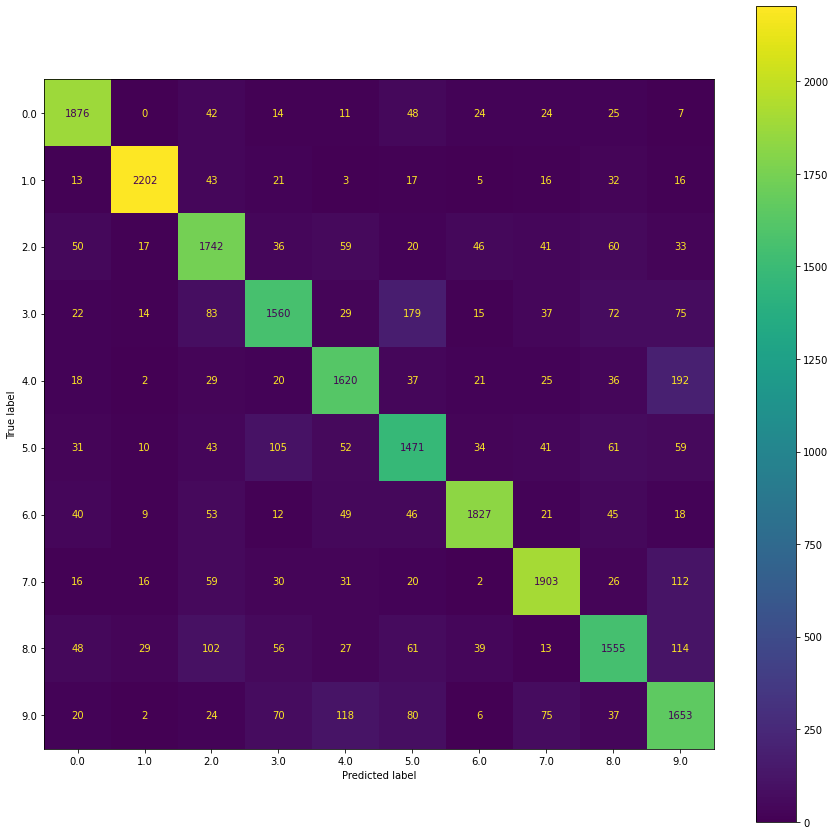

In [275]:
# dividing the dataset into learner (70%) and training
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

DEPTH = 10
tree = tree.DecisionTreeClassifier(max_depth = DEPTH)
tree.fit(features_train, labels_train)
predictions = tree.predict(features_test)

# provide F1 result, confusion matrix and classification report.
F1 = f1_score(labels_test, predictions, average='micro')
print('F1 = ', F1)

confusion_matrix = confusion_matrix(labels_test, predictions)
print('Confusion matrix = ', confusion_matrix)

fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(tree,features_test,labels_test,ax = ax)
fig.show()


report = classification_report(labels_test, predictions)
print('Classification report:', report)